# MECANISMO CINCO BARRAS 

## PROBLEMAS VELOCIDAD Y ACELERACIÓN

### PASO 1: MATRIZ JACOBIANA 

Para resolver el problema velocidad, necesitamos otra vez la matriz jacobiana. El método de construcción aparece detallado en el notebook Problema_Posición_5B, por lo que para este caso copiaremos el código de los pasos realizados para poder conseguirla.

In [1]:
import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('MECANISMO DE CUATRO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["L4"] = float (input ('Introduce longitud L4: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input('Introduce angulo inicial beta: ')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [2], [0.1], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((8,8))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(X3-X2)
    Jacob[2,3] = -2*(Y3-Y2)
    Jacob[2,4] = 2*(X3-X2)
    Jacob[2,5] = 2*(Y3-Y2)
    Jacob[3,4] = -2*(meca["XB"]-X3)
    Jacob[3,5] = -2*(meca["YB"]-Y3)

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Jacob[4,6] = meca["L1"]*math.sin(theta)
        Jacob[4,0] = 1
    else:
        Jacob[4,6] = -meca["L1"]*math.cos(theta)
        Jacob[4,1] = 1


    if ((math.cos(beta)) < (math.sqrt(2)/2) ):
        Jacob[5,7] = meca["L4"]*math.sin(beta)
        Jacob[5,4] = 1
    else:
        Jacob[5,7] = -meca["L4"]*math.cos(beta)
        Jacob[5,5] = 1

    Jacob[6,6] = 1
    Jacob[7,7] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((8,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
	
    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (X3-X2)**2 + (Y3-Y2)**2 - meca["L3"]**2
    Phi[3] = (meca["XB"] - X3)**2 + (meca["YB"] - Y3)**2 - meca["L4"]**2

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Phi[4] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[4] = Y1-meca["L1"]*math.sin(theta)
		
    if (abs(math.cos(beta)) < (math.sqrt(2)/2) ):
        Phi[5] = (X3-meca["XB"])-meca["L4"]*math.cos(beta)
    else: 
        Phi[5] = Y3-meca["L4"]*math.sin(beta)
		
    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((8,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):



        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        X3 = q[4]
        Y3 = q[5]
        theta = q[6]
        beta = q[7]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1

    return q

q = resuelve_prob_posicion (q,meca)
J = jacob_Phiq(q,meca)
print ("Jacob=")
pprint.pprint(J)

MECANISMO DE CUATRO BARRAS
Introduce longitud L1:1
Introduce longitud L2:1
Introduce longitud L3:1
Introduce longitud L4: 1
Introduce angulo inicial theta:1
Introduce angulo inicial beta: 1
Introduce coordenada en x del punto B:1
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [2. ]
 [0.1]
 [1. ]
 [1. ]]
Jacob=
array([[ 1.08060461,  1.68294197,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.        , -1.73205081,  1.        ,  1.73205081,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.        ,  1.73205081,  1.        ,
        -1.73205081,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.08060461,
         1.68294197,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.84147098,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0. 

### PASO 2: PROBLEMA VELOCIDAD

Consiste en determinar las velocidades de todas las variables del mecanismo una vez sabemos su posición $q$ y la velocidad de los grados de libertad. 

Partimos de la ecuación:

#Фq · q_p = -Ф_p$

Siendo $q_p$ el vector velocidad, $Фq$ el jacobiano y $Ф_p$ la derivada parcial de las ecuaciones de restricción respecto al tiempo. Para las ecuaciones de sólido rígido el valor de esta derivada es $0$. Solo tendría un valor no nulo la correspondiente al ángulo, que en ese caso tendría la velocidad que nosotros le indiquemos. 

En este caso vamos a tomar un valor de $1$. 

Por lo tanto, tendríamos:

$q_p = Фq/Ф_p$

In [2]:
# PASO 2

def resuelve_prob_velocidad(q,meca):
    
    b = np.zeros ((8,1))
    #Velocidad del gdl.
    b[6]=0.2
    b[7] = 0.2
    qp = np.linalg.solve(jacob_Phiq(q,meca),b)
 
    return qp
	
resuelve_prob_velocidad (q,meca)

array([[-0.1682942 ],
       [ 0.10806046],
       [-0.1682942 ],
       [ 0.10806046],
       [-0.1682942 ],
       [ 0.10806046],
       [ 0.2       ],
       [ 0.2       ]])

### PASO 3: PROBLEMA ACELERACIÓN

El problema aceleración trata de determinar las aceleraciones de todas las variables del mecanismo, conociendo la posición$q$, la velocidad $q_p$ y las aceleraciones de los grados de libertad. 

La ecuación de la que partimos es:

$Фq · q_pp = -∂_Фq · q_p$

Siendo Фq el jacobiano, q_pp el vector aceleración, q_p el vector velocidad y ∂_Фq la derivada del jacobiano respecto al tiempo. 

Es decir, si llamamos &b& al conjunto $∂_Фq · q_p$ tendríamos como resultado:

$q_pp = -Фq/b$

El vector velocidad será:

\begin{equation}
\mathbf{q_p} = 
\begin{bmatrix}
X_1q \\
Y_1q \\
X_2q \\
Y_2q \\
X_3q \\
Y_3q \\
θ_q\\
\beta_q \\
\end{bmatrix}
\end{equation}

Por otro lado, para calcular la derivada del jacobiano solo tenemos en cuenta las filas que hacen referencia a las ecuaciones de las coordenadas independientes, ya que la última que añadimos para poder realizar los cálculos era adicional. Teniendo en cuenta esto, la derivada del jacobiano sería:

¡¡¡¡ COMPLETAR !!!!

Como ya tenemos $∂_Фq$ y $q_p$, podemos calcular $b$. La última fila que añadimos es el valor de la aceleración angular, dato que sabemos de antemano. 

In [3]:
#PASO 3

def resuelve_prob_aceleracion (q,meca):

    b=np.zeros ((8,1))
    qp = resuelve_prob_velocidad (q,meca)
	
	#Extraer las posiciones
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
    #Extraer las velocidades
    X1q = qp[0]
    Y1q = qp[1]
    X2q = qp[2]
    Y2q = qp[3]
    X3q = qp[4]
    Y3q = qp[5]
    thetaq = qp[6]
    betaq = qp[7]
    
    b[0] = 2*(X1q)**2 + 2*(Y1q)**2
    b[1] = -2*X1q*(X2q-X1q) - 2*Y1q*(Y2q-Y1q) + 2*X2q*(X2q*X1q) + 2*Y2q*(Y2q*Y1q)
    b[2] = -2*X2q*(X3q-X2q) + 2*Y2q*Y3q + 2*X3q*(X3q-X2q) + 2*Y3q*(Y3q-Y2q)
    b[3] = -2*X3q**2 - 2*Y3q**2
    
    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        b[4] = thetaq**2 * (meca["L1"] * math.cos(theta))
    else: 
        b[4] =  thetaq**2 * (meca["L1"] * math.sin(theta))
    
    if (abs(math.cos(beta)) < (math.sqrt(2)/2) ):
        b[5] = betaq**2 * (meca["L4"] * math.cos(beta))
    else: 
        b[5] =  betaq**2 * (meca["L4"] * math.sin(beta))
		
    b[6] = 1 #Aceleracion conocida 
    b[7] = 1
    qpp = np.linalg.solve(-jacob_Phiq(q,meca),b)

     
    return qpp

resuelve_prob_aceleracion(q, meca)

array([[ 0.81985889],
       [-0.57396115],
       [ 0.75270628],
       [-0.53114362],
       [ 0.81985889],
       [-0.47888954],
       [-1.        ],
       [-1.        ]])

### PASO 4: GRÁFICAS DE VELOCIDADES

Vamos a representar por separado la gráfica de la velocidad en cada coordenada $(X_1, ~ Y_1, ~ X_2, ~ Y_2, ~ X_3 ~ e ~ Y_3)$.


VX1=
array([-0.31148154, -0.30892427, -0.30129445, -0.28871736, -0.27139951,
       -0.24962527, -0.22375218, -0.15636656, -0.1710288 , -0.18288274,
       -0.19173374, -0.19743646, -0.19989727, -0.19907575, -0.1949854 ,
       -0.18769337, -0.17731942, -0.16403387, -0.14805487,  0.23717751,
        0.26105   ,  0.28063603,  0.295614  ,  0.30573797,  0.31084172,
        0.31084142,  0.3057371 ,  0.29561256,  0.28063404,  0.2610475 ,
        0.23717455,  0.14805685,  0.16403555,  0.17732078,  0.18769439,
        0.19498605,  0.19907603,  0.19989717,  0.19743599,  0.19173291,
        0.18288155,  0.17102728,  0.15636473, -0.22375536, -0.24962801,
       -0.27140176, -0.28871908, -0.30129561, -0.30892486, -0.31148154])


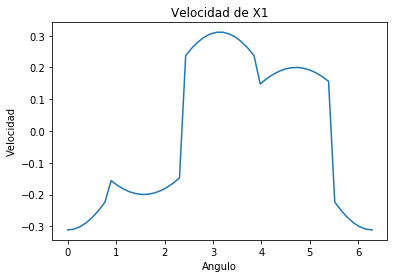

In [4]:
#PASO 4: VELOCIDAD DE X1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX1 = np.append(VX1, qp[0])

        i=i+1
      
    print ("VX1=")
    pprint.pprint(VX1)
 
    plt.plot(th,VX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY1=
array([ 0.2       ,  0.198358  ,  0.19345894,  0.18538328,  0.17426362,
        0.16028255,  0.14366962,  0.10040181,  0.10981633,  0.11742766,
        0.12311082,  0.12677249,  0.12835256,  0.12782507,  0.12519868,
        0.12051653,  0.11385549,  0.10532494,  0.09506494, -0.15228993,
       -0.16761828, -0.18019432, -0.18981157, -0.1963121 , -0.19958917,
       -0.19958898, -0.19631153, -0.18981064, -0.18019305, -0.16761667,
       -0.15228803, -0.09506621, -0.10532601, -0.11385636, -0.12051718,
       -0.1251991 , -0.12782525, -0.1283525 , -0.12677219, -0.12311028,
       -0.1174269 , -0.10981535, -0.10040064,  0.14367166,  0.1602843 ,
        0.17426507,  0.18538439,  0.19345969,  0.19835837,  0.2       ])


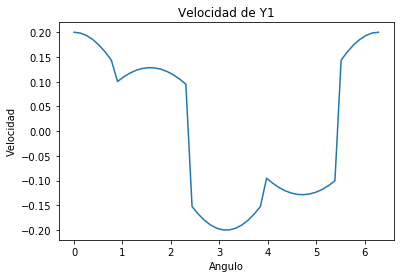

In [5]:
#PASO 4: VELOCIDAD DE Y1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY1 = np.append(VY1, qp[1])

        i=i+1
      
    print ("VY1=")
    pprint.pprint(VY1)
 
    plt.plot(th,VY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX2=
array([-0.31148154, -0.30892427, -0.30129445, -0.28871736, -0.27139951,
       -0.24962527, -0.22375218, -0.15636656, -0.1710288 , -0.18288274,
       -0.19173374, -0.19743646, -0.19989727, -0.19907575, -0.1949854 ,
       -0.18769337, -0.17731942, -0.16403387, -0.14805487, -0.150212  ,
       -0.12986007, -0.10737584, -0.08312849, -0.05751617, -0.03095943,
       -0.00389433,  0.02323471,  0.04998224,  0.07590905,  0.10058944,
        0.12361814,  0.14805685,  0.16403555,  0.17732078,  0.18769439,
        0.19498605,  0.19907603,  0.19989717,  0.19743599,  0.19173291,
        0.18288155,  0.17102728,  0.15636473, -0.22375536, -0.24962801,
       -0.27140176, -0.28871908, -0.30129561, -0.30892486, -0.31148154])


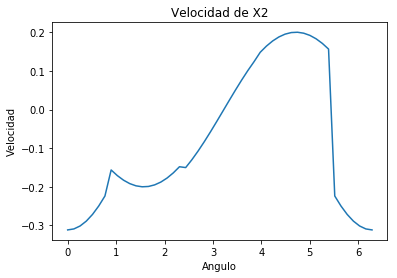

In [6]:
#PASO 4: VELOCIDAD DE X2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX2 = np.append(VX2, qp[2])

        i=i+1
      
    print ("VX2=")
    pprint.pprint(VX2)
 
    plt.plot(th,VX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY2=
array([ 0.2       ,  0.198358  ,  0.19345894,  0.18538328,  0.17426362,
        0.16028255,  0.14366962,  0.10040181,  0.10981633,  0.11742766,
        0.12311082,  0.12677249,  0.12835256,  0.12782507,  0.12519868,
        0.12051653,  0.11385549,  0.10532494,  0.09506494,  0.07136951,
        0.05807376,  0.04382443,  0.02885551,  0.01341278, -0.00225019,
       -0.01787621, -0.0332087 , -0.04799591, -0.06199502, -0.07497617,
       -0.0867262 , -0.09506621, -0.10532601, -0.11385636, -0.12051718,
       -0.1251991 , -0.12782525, -0.1283525 , -0.12677219, -0.12311028,
       -0.1174269 , -0.10981535, -0.10040064,  0.14367166,  0.1602843 ,
        0.17426507,  0.18538439,  0.19345969,  0.19835837,  0.2       ])


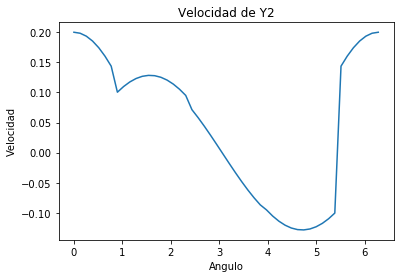

In [7]:
#PASO 4: VELOCIDAD DE Y2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY2 = np.append(VY2, qp[3])

        i=i+1
      
    print ("VY2=")
    pprint.pprint(VY2)
 
    plt.plot(th,VY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX3=
array([-0.31148154, -0.30892427, -0.30129445, -0.28871736, -0.27139951,
       -0.24962527, -0.22375218, -0.15636656, -0.1710288 , -0.18288274,
       -0.19173374, -0.19743646, -0.19989727, -0.19907575, -0.1949854 ,
       -0.18769337, -0.17731942, -0.16403387, -0.14805487, -0.12964481,
       -0.10910598, -0.08677561, -0.06302039, -0.03823037, -0.01281261,
        0.01281554,  0.03823326,  0.06302318,  0.08677826,  0.10910844,
        0.12964705,  0.14805685,  0.16403555,  0.17732078,  0.18769439,
        0.19498605,  0.19907603,  0.19989717,  0.19743599,  0.19173291,
        0.18288155,  0.17102728,  0.15636473, -0.22375536, -0.24962801,
       -0.27140176, -0.28871908, -0.30129561, -0.30892486, -0.31148154])


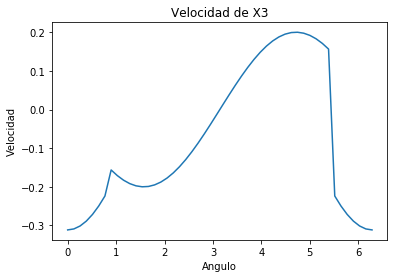

In [8]:
#PASO 4: VELOCIDAD DE X3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX3 = np.append(VX3, qp[4])

        i=i+1
      
    print ("VX3=")
    pprint.pprint(VX3)
 
    plt.plot(th,VX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X3')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY3=
array([ 0.2       ,  0.198358  ,  0.19345894,  0.18538328,  0.17426362,
        0.16028255,  0.14366962,  0.10040181,  0.10981633,  0.11742766,
        0.12311082,  0.12677249,  0.12835256,  0.12782507,  0.12519868,
        0.12051653,  0.11385549,  0.10532494,  0.09506494,  0.08324398,
        0.07005614,  0.05571798,  0.04046493,  0.02454744,  0.00822688,
       -0.00822876, -0.02454929, -0.04046672, -0.05571968, -0.07005772,
       -0.08324541, -0.09506621, -0.10532601, -0.11385636, -0.12051718,
       -0.1251991 , -0.12782525, -0.1283525 , -0.12677219, -0.12311028,
       -0.1174269 , -0.10981535, -0.10040064,  0.14367166,  0.1602843 ,
        0.17426507,  0.18538439,  0.19345969,  0.19835837,  0.2       ])


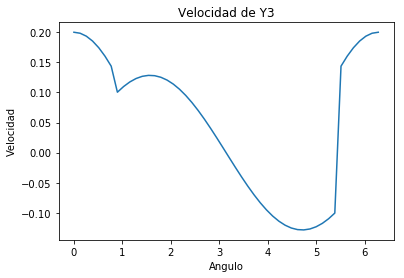

In [9]:
#PASO 4: VELOCIDAD DE Y3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY3 = np.append(VY3, qp[5])

        i=i+1
      
    print ("VY3=")
    pprint.pprint(VY3)
 
    plt.plot(th,VY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y3')

    plt.show()
    return 

grafica_velocidad (q,meca)

### PASO 5: GRÁFICAS ACELERACIONES

Haremos el mismo procedimiento que para la velocidad, representando en celdas separadas la aceleración de cada coordenada.

AX1=
array([ 1.30380756,  1.30313453,  1.28499075,  1.24907791,  1.19503548,
        1.12250868,  1.03123565,  0.75689326,  0.83440839,  0.89822248,
        0.94728772,  0.98079844,  0.99820441,  0.99921981,  0.98382798,
        0.95228164,  0.90509879,  0.84305417,  0.76716656, -1.29254439,
       -1.44939352, -1.58201102, -1.68686069, -1.76111567, -1.80277706,
       -1.81075781, -1.78492691, -1.7261115 , -1.636057  , -1.51734739,
       -1.37329051, -0.71339249, -0.79729339, -0.8681027 , -0.92465772,
       -0.96602982, -0.99153966, -1.00076837, -0.99356441, -0.97004608,
       -0.93059954, -0.87587251, -0.80676362,  0.94457143,  1.04799923,
        1.13390441,  1.20232916,  1.25339205,  1.28720483,  1.30380848])


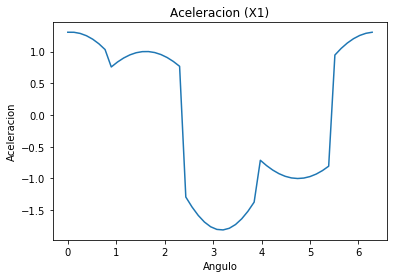

In [10]:
#PASO 5: ACELERACION DE X1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    AX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX1 = np.append(AX1, qpp[0])

        i=i+1
      
    print ("AX1=")
    pprint.pprint(AX1)	
 
    plt.plot(th,AX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)


AY1=
array([-1.        , -0.99690507, -0.97744092, -0.94192713, -0.89094686,
       -0.82533719, -0.74617545, -0.52703208, -0.58486063, -0.63287628,
       -0.66994567, -0.69518747, -0.70800474, -0.70810662, -0.69551838,
       -0.67057927, -0.63392823, -0.58647841, -0.52938183,  0.73552069,
        0.81627018,  0.88361648,  0.93645375,  0.9739144 ,  0.99538333,
        1.00050802,  0.98920432,  0.96165783,  0.91832088,  0.85990505,
        0.78736954,  0.42127322,  0.46677572,  0.50463055,  0.53458899,
        0.55647048,  0.57014515,  0.57552099,  0.57253665,  0.56116074,
        0.54139756,  0.51329898,  0.47698142, -0.69053139, -0.77749751,
       -0.85169709, -0.91191176, -0.9571528 , -0.98667734, -1.00000059])


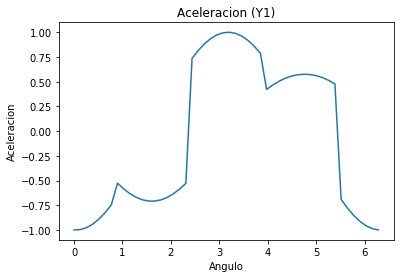

In [11]:
#PASO 5: ACELERACION DE Y1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY1 = np.append(AY1, qpp[1])

        i=i+1
      
    print ("AY1=")
    pprint.pprint(AY1)	
 
    plt.plot(th,AY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX2=
array([ 1.6196279 ,  1.61361093,  1.57981095,  1.51902731,  1.43263399,
        1.32251412,  1.19097705,  0.69870762,  0.76511454,  0.81928182,
        0.86076039,  0.88921088,  0.90439186,  0.90615282,  0.8944318 ,
        0.86925798,  0.83075924,  0.77917415,  0.71486829,  0.50029919,
        0.37960811,  0.25454307,  0.1279381 ,  0.0023134 , -0.12018384,
       -0.23781067, -0.34923274, -0.45350441, -0.55002792, -0.63849586,
       -0.71882145, -0.77046485, -0.86766543, -0.95064234, -1.01740602,
       -1.06632821, -1.09620903, -1.10632711, -1.09646929, -1.0669377 ,
       -1.01853398, -0.95252175, -0.87057001,  1.1043175 ,  1.24800918,
        1.37150697,  1.47228187,  1.54821459,  1.59768245,  1.61962881])


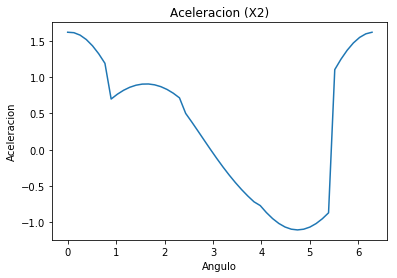

In [12]:
#PASO 5: ACELERACION DE X2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX2 = np.append(AX2, qpp[2])

        i=i+1
      
    print ("AX2=")
    pprint.pprint(AX2)	
 
    plt.plot(th,AX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY2=
array([-1.15668131, -1.15112783, -1.12443378, -1.07734919, -1.01115187,
       -0.92760396, -0.8288913 , -0.49019256, -0.54060637, -0.58210663,
       -0.61400476, -0.63577502, -0.64706031, -0.6476759 , -0.63761148,
       -0.61703162, -0.5862747 , -0.54584994, -0.49643199, -0.45028614,
       -0.40565119, -0.35240222, -0.29070571, -0.22111145, -0.14456742,
       -0.06241147,  0.02365982,  0.11164333,  0.19930003,  0.28424049,
        0.36402116,  0.45146843,  0.50365761,  0.54755115,  0.58252323,
        0.60808373,  0.62387755,  0.62968364,  0.62541452,  0.6111169 ,
        0.5869734 ,  0.5533051 ,  0.51057415, -0.77324952, -0.87976645,
       -0.97190403, -1.04733537, -1.10414675, -1.14090066, -1.1566819 ])


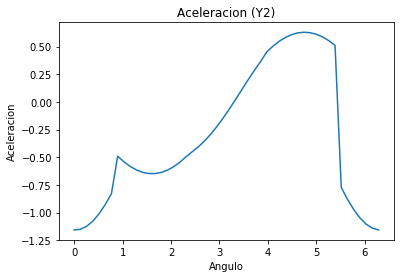

In [13]:
#PASO 5: ACELERACION DE Y2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY2 = np.append(AY2, qpp[3])

        i=i+1
      
    print ("AY2=")
    pprint.pprint(AY2)	
 
    plt.plot(th,AY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX3=
array([ 1.81100789,  1.80204079,  1.75955732,  1.68485127,  1.58009956,
        1.44826436,  1.29296318,  0.75689326,  0.83440839,  0.89822248,
        0.94728772,  0.98079844,  0.99820441,  0.99921981,  0.98382798,
        0.95228164,  0.90509879,  0.84305417,  0.76716656,  0.62229509,
        0.52370868,  0.41652294,  0.30249788,  0.18350578,  0.06150052,
       -0.06151459, -0.18351963, -0.30251127, -0.41653565, -0.5237205 ,
       -0.62230584, -0.71339249, -0.79729339, -0.8681027 , -0.92465772,
       -0.96602982, -0.99153966, -1.00076837, -0.99356441, -0.97004608,
       -0.93059954, -0.87587251, -0.80676362,  1.20630641,  1.37376205,
        1.51897486,  1.6381077 ,  1.72796228,  1.78611298,  1.8110088 ])


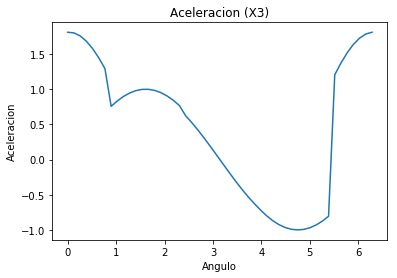

In [14]:
#PASO 5: ACELERACION DE X3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX3 = np.append(AX3, qpp[4])

        i=i+1
      
    print ("AX3=")
    pprint.pprint(AX3)	
 
    plt.plot(th,AX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY3=
array([-1.        , -0.99690507, -0.97744092, -0.94192713, -0.89094686,
       -0.82533719, -0.74617545, -0.44495908, -0.48667429, -0.52060776,
       -0.54654723, -0.56433941, -0.57387463, -0.57507671, -0.56789898,
       -0.55232674, -0.52838627, -0.49615931, -0.45580214, -0.37136175,
       -0.31629021, -0.25480832, -0.18756597, -0.1153747 , -0.0392135 ,
        0.03977371,  0.12028998,  0.20090652,  0.28009323,  0.35625724,
        0.42778829,  0.49485488,  0.55709668,  0.61017412,  0.6528428 ,
        0.68409075,  0.70317543,  0.70965097,  0.70338409,  0.6845581 ,
        0.65366463,  0.61148357,  0.5590525 , -0.69053139, -0.77749751,
       -0.85169709, -0.91191176, -0.9571528 , -0.98667734, -1.00000059])


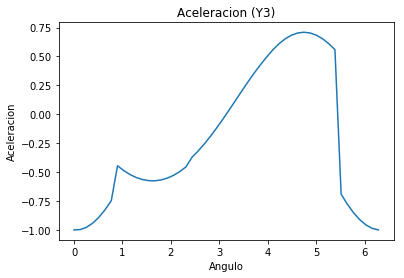

In [15]:
#PASO 5: ACELERACION DE Y3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY3 = np.append(AY3, qpp[5])

        i=i+1
      
    print ("AY3=")
    pprint.pprint(AY3)	
 
    plt.plot(th,AY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)